<a href="https://colab.research.google.com/github/Guna940/Ex02-Developing-a-Neural-Network-Classification-ModelAssignment/blob/main/Neural-Network-Classification-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [93]:
data = pd.read_csv("customers.csv")
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [94]:
data_cleaned=data.drop(columns=["ID","Var_1"])
data_col=list(data_cleaned.columns)

In [95]:
pd.DataFrame(data_cleaned.isnull().sum())

,0
Gender,0
Ever_Married,190
Age,0
Graduated,102
Profession,162
Work_Experience,1098
Spending_Score,0
Family_Size,448
Segmentation,0


In [96]:
data_cleaned=data_cleaned.dropna(axis=0)

In [97]:
pd.DataFrame(data_cleaned.isnull().sum())

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Segmentation,0


In [98]:
data_cleaned.shape

(8896, 9)

In [99]:
data_cleaned.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

**Encoding the inputs using Ordinal encoder**

In [103]:
data_col_obj=list()
for c in data_col:
  if data_cleaned[c].dtype=='O':
      data_col_obj.append(c)
data_col_obj.remove("Segmentation")
print(data_col_obj)

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']


In [104]:
from sklearn.preprocessing import OrdinalEncoder
data_cleaned[data_col_obj]=OrdinalEncoder().fit_transform(data_cleaned[data_col_obj])
from sklearn.preprocessing import MinMaxScaler
data_cleaned[["Age"]]=MinMaxScaler().fit_transform(data_cleaned[["Age"]])
data_cleaned.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1.0,0.0,0.056338,0.0,5.0,1.0,2.0,4.0,D
2,0.0,1.0,0.690141,1.0,2.0,1.0,2.0,1.0,B
3,1.0,1.0,0.690141,1.0,7.0,0.0,1.0,2.0,B
5,1.0,1.0,0.535211,0.0,0.0,0.0,0.0,2.0,C
6,1.0,0.0,0.197183,1.0,5.0,1.0,2.0,3.0,C


In [105]:
y=data_cleaned[["Segmentation"]].values
y=OneHotEncoder().fit_transform(y).toarray()
pd.DataFrame(y)

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
8891,0.0,0.0,0.0,1.0
8892,0.0,1.0,0.0,0.0
8893,1.0,0.0,0.0,0.0
8894,0.0,0.0,1.0,0.0


In [107]:
X=data_cleaned.iloc[:,:-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

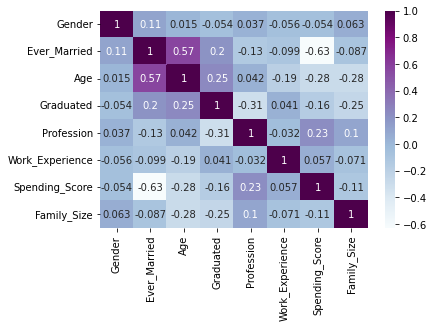

In [109]:
corr = data_cleaned.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

In [110]:
model=Sequential([
    Dense(64,input_shape=X_train.iloc[0].shape,activation="relu"),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(4,activation='softmax'),
])

In [111]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=15)
model.fit(x=X_train,y=y_train,
          epochs=400,
          validation_data=(X_test,y_test),
          verbose=0, 
          callbacks=[early_stop]
          )

In [119]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.292560,0.411434,1.243715,0.426752
1,1.226816,0.434238,1.215871,0.464968
2,1.209612,0.454151,1.207954,0.450731
3,1.204073,0.457042,1.202434,0.461971
4,1.198819,0.458969,1.202957,0.463095


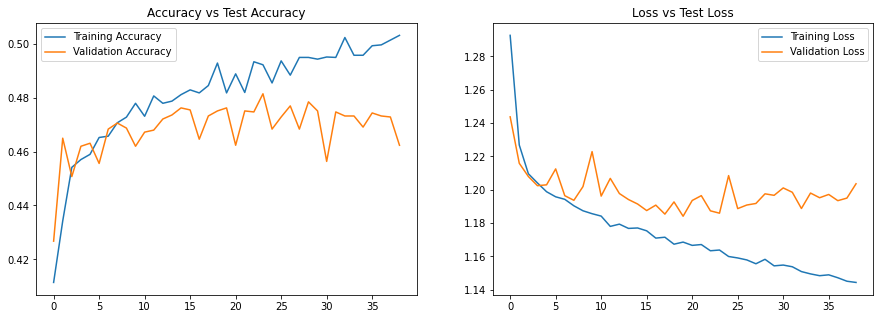

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(metrics[['accuracy','val_accuracy']])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.title("Accuracy vs Test Accuracy")
plt.subplot(1,2,2)
plt.plot(metrics[['loss','val_loss']])
plt.legend(["Training Loss","Validation Loss"])
plt.title("Loss vs Test Loss")
plt.show()

In [121]:
predictions=np.argmax(model.predict(X_test),axis=1)
y_test=np.argmax(y_test, axis=1)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.41      0.43      0.42       715
           1       0.35      0.38      0.36       605
           2       0.48      0.48      0.48       640
           3       0.64      0.55      0.59       709

    accuracy                           0.46      2669
   macro avg       0.47      0.46      0.46      2669
weighted avg       0.47      0.46      0.47      2669



In [127]:
print(confusion_matrix(y_test,predictions))

[[306 179 125 105]
 [163 230 159  53]
 [ 98 175 308  59]
 [181  82  56 390]]


In [146]:
x_single_prediction = np.argmax(model.predict(X_test.iloc[1:2,:]), axis=1)
display(X_test.iloc[1:2,:])
print("\nThe model has predicted=",x_single_prediction)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
8569,1.0,0.0,0.126761,1.0,3.0,8.0,2.0,4.0



The model has predicted= [3]
